# DATA PREPROCESSING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/student-data.csv")


In [3]:
features = ["studytime", "absences", "G1", "G2"]
X = df[features].values
y = df["G3"].values


test-train split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [18]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled  = (X_test - X_mean) / X_std

# LINEAR REGRESSION

In [6]:
# Initialize parameters
m, n = X_train_scaled.shape
weights = np.zeros(n)
bias = 0

In [7]:
# Hypothesis function
def predict(X,w,b):
    return np.dot(X, w) + b

In [13]:
# Cost function
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = predict(X, w, b)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

In [15]:
# Gradient Descent
def gradient_descent(X, y, w, b, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = predict(X, w, b)
        

        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

In [16]:
# Training the model
weights, bias, cost_history = gradient_descent(
    X_train_scaled,
    y_train,
    weights,
    bias,
    learning_rate=0.01,
    iterations=1000
)


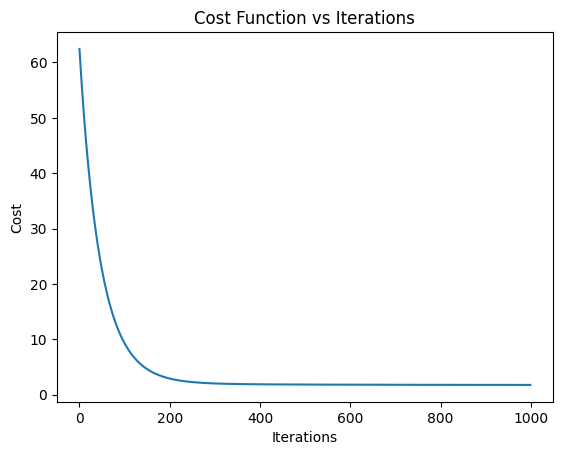

In [17]:
# Plot loss curve
plt.figure()
plt.plot(cost_history)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


In [19]:
# Evaluate on Test Set
y_pred = predict(X_test_scaled, weights, bias)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
rmse


np.float64(13.503785556899562)